# Load library

In [1]:
from importlib import reload
import RunningCode as RTA
from IPython.display import clear_output, display
import os
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd


# Run Program

This involves creating an audio buffer that we continually update with information from the microphone, then creating an image and running it through the neural net. This happens as fast as possible over and over again.

In [24]:
def FullOut(predicted,prob,classes):
    clear_output(wait=True)
    print(classes[predicted[0,0]], prob[0,0])

In [20]:
imbackout=None
def test(im):
    global imbackout
    imbackout=im
    print(im);

In [28]:
RTA.RunTheSystem(FullOut,TargetTime=5,ModelPath="../models/CatDogResNet.pth")

Cats tensor(0.7258, grad_fn=<SelectBackward>)
Stopping!
Stopped and Done!


In [22]:
reload(RTA)

<module 'RunningCode' from '/Users/dg/GitRepos/RealtimeAudioClassification/03_Running/RunningCode.py'>

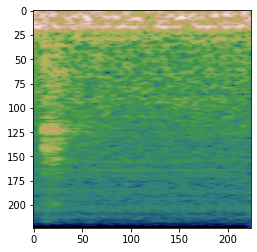

In [18]:
plt.imshow(imbackout[:,-224:,:])

In [86]:
EvaluationFile = '../AudioData/UrbanSound/street_music/194841.flac'

In [87]:
a,b,c =RTA.EvaluateOneFile(EvaluationFile,ModelPath="../models/UrbanResNet.pth")
a=np.array(a)
b=np.array(b)

/Users/d.goedicke/Desktop/CoctailParty/RealtimeAudioClassification/03_Running/RunningResNetLibrary.py:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(outputs)


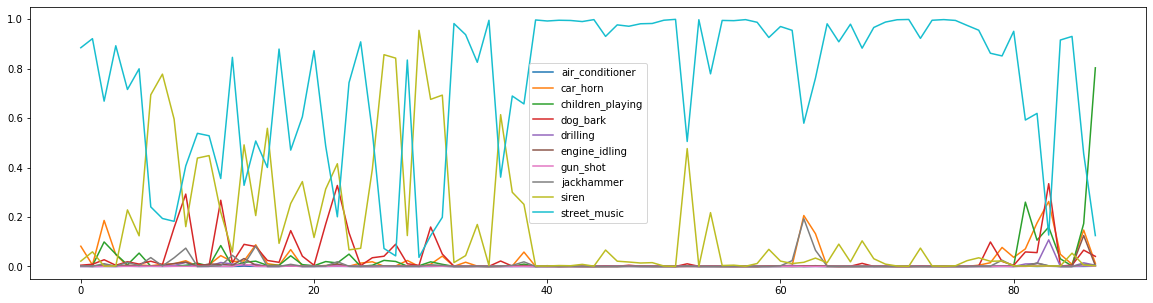

In [ ]:
plt.figure(figsize=(20,5)) 
for i, val in enumerate(a.T):
    plt.plot(b.T[i],label=c[i])
plt.legend()
plt.show()
ipd.Audio(EvaluationFile) 